In [40]:
!pip install pdf2image
!apt-get install poppler-utils
!pip install pytesseract
!apt-get install tesseract-ocr
!pip install pdf2image
!pip install pdfminer.six

Defaulting to user installation because normal site-packages is not writeable
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Defaulting to user installation because normal site-packages is not writeable
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [41]:
import mlflow
import mlflow.xgboost


In [42]:
import re
from pdfminer.high_level import extract_text
from pdfminer.pdfpage import PDFPage
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import nltk
from nltk.tokenize import word_tokenize


def extract_text_from_page(pdf_file_path, page_number):
    with open(pdf_file_path, 'rb') as file:
        text = extract_text(file, page_numbers=[page_number])
    return text

# Function to extract text from an image using pytesseract
def extract_text_from_image(image):
    text = pytesseract.image_to_string(image,lang='eng')
    return text

# Function to clean up and concatenate the extracted text
def clean_and_concatenate_text(text):
    # Split text into lines, strip extra spaces, and join lines with a single space
    lines = text.splitlines()
    cleaned_lines = [re.sub(r'\s+', ' ', line).strip() for line in lines if line.strip()]
    concatenated_text = ' '.join(cleaned_lines)
    concatenated_text = re.sub(r'_+|[^a-zA-Z0-9\s]', '', concatenated_text)

    return concatenated_text.lower()


# Function to convert pdf to text with using pdfminer or tesseract-ocr
def process_pdf(pdf_file_path, doc_type):
    with open(pdf_file_path, 'rb') as file:
        pages = list(PDFPage.get_pages(file))


    # Process each page to extract, clean, and classify the text
    print("pdf_file_path",pdf_file_path,doc_type)
    for i in range(len(pages)):

        # Extract text from the PDF page
        pdf_text = extract_text_from_page(pdf_file_path, i)
        cleaned_pdf_text = clean_and_concatenate_text(pdf_text)

        print("len pdf_text",len(pdf_text))
        print("pdf_text",pdf_text)

        if cleaned_pdf_text:
            page_type = f"{doc_type_mapping[doc_type]}_first_page" if i == 0 else f"{doc_type_mapping[doc_type]}_next_page"
            dataset.append({"document_type": page_type, "text": cleaned_pdf_text, "file_name": pdf_file_path})


        else: # If no text, convert the page to an image and use OCR

            print(f"Page {i} is an image. Extracting text using OCR...")
            # Convert only the specific page to an image
            images = convert_from_path(pdf_file_path, first_page=i+1, last_page=i+1)
            image = images[0]  # Since we're only converting one page
            ocr_text = extract_text_from_image(image)
            cleaned_ocr_text = clean_and_concatenate_text(ocr_text)
            page_type = f"{doc_type_mapping[doc_type]}_first_page" if i == 0 else f"{doc_type_mapping[doc_type]}_next_page"
            dataset.append({"document_type": page_type, "text": cleaned_ocr_text, "file_name": pdf_file_path})


In [43]:
import pandas as pd
# df = pd.DataFrame(dataset)

# Save the dataset to a CSV file
# df.to_csv('/content/testing_dataset.csv', index=False)

# print("Dataset created and saved to 'testing_dataset.csv'")

df=pd.read_csv('/home/parthpatil/Documents/testing_dataset(1).csv')
df


,document_type,text,file_name
0,po_first_page,vendor code10221985 rotex manufacturers engin...,/home/parthpatil/Documents/testing_data/Data_2...
1,po_next_page,10221985 otnheft rotex manufacturers engineer...,/home/parthpatil/Documents/testing_data/Data_2...
2,po_first_page,vendor code10221985 rotex manufacturers engin...,/home/parthpatil/Documents/testing_data/Data_2...
3,po_next_page,10221985 rotex manufacturers engineers privat...,/home/parthpatil/Documents/testing_data/Data_2...
4,po_first_page,vendor code10221985 rotex manufacturers engin...,/home/parthpatil/Documents/testing_data/Data_2...
...,...,...,...
899,gstn_first_page,amended government of india form gst reg06 see...,/home/parthpatil/Documents/testing_data/Data_3...
900,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...
901,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...
902,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...


In [44]:
df['document_type'].value_counts()

po_next_page        409
bs_first_page        91
pnl_first_page       89
bs_next_page         83
po_first_page        55
gstn_next_page       31
gstn_first_page      30
itr_first_page       27
udyam_first_page     24
cc_first_page        22
cin_first_page       12
poa_first_page       10
udyam_next_page       9
pnl_next_page         8
poa_next_page         4
Name: document_type, dtype: int64

In [45]:
has_nan = df.isna().any().any()
print(f"Any NaN values in DataFrame: {has_nan}")

Any NaN values in DataFrame: True


In [46]:
df = df.dropna()

df = df.reset_index(drop=True)
df

,document_type,text,file_name
0,po_first_page,vendor code10221985 rotex manufacturers engin...,/home/parthpatil/Documents/testing_data/Data_2...
1,po_next_page,10221985 otnheft rotex manufacturers engineer...,/home/parthpatil/Documents/testing_data/Data_2...
2,po_first_page,vendor code10221985 rotex manufacturers engin...,/home/parthpatil/Documents/testing_data/Data_2...
3,po_next_page,10221985 rotex manufacturers engineers privat...,/home/parthpatil/Documents/testing_data/Data_2...
4,po_first_page,vendor code10221985 rotex manufacturers engin...,/home/parthpatil/Documents/testing_data/Data_2...
...,...,...,...
896,gstn_first_page,amended government of india form gst reg06 see...,/home/parthpatil/Documents/testing_data/Data_3...
897,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...
898,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...
899,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   document_type  901 non-null    object
 1   text           901 non-null    object
 2   file_name      901 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [48]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    """Clean the input text by lowercasing, removing punctuation, stopwords, and extra whitespace."""
    print("text",text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/parthpatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/parthpatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
def preprocess_dataframe(df):
    """Apply text cleaning to the 'doc_text' column and convert 'type' to integer."""
    df['text'] = df['text'].apply(clean_text)
    return df

In [50]:
df=preprocess_dataframe(df)

text vendor code10221985 rotex manufacturers  engineers qtn ref qtndt 05102017 payment terms see details below purchase order call off contract reference 10028157 po no po date27042018 collref 25486752 incoterms total items on po  tot po amtinr 1 496800000 for all correspondence pls quote po no as above private limited manpada road mumbai421204 mumbai421204 maharashtra telno 02512871033 faxno 02512871191 gst reg no 27aaacr2195llz2 gst payable to vendor vendor pan aaacr2195l  vendor email skshahrotexindiacom pure material gst dear sirs subject to the terms and conditions and instruction given herein over leafif any alongwith enclosures please dispatch deliver the following material unless otherwise specified at item level supply to plant 2129 ioc  haldia terminal 19aaaci1681g1zm store revn revenue store b gstin srno code uom quantity unit price amount group 1 valve controlsafety supplementary requirements additional requirements spares 00010 8375955093 ea each 6 ea inr triple offset but

In [51]:
df


,document_type,text,file_name
0,po_first_page,vendor code10221985 rotex manufacturers engine...,/home/parthpatil/Documents/testing_data/Data_2...
1,po_next_page,10221985 otnheft rotex manufacturers engineers...,/home/parthpatil/Documents/testing_data/Data_2...
2,po_first_page,vendor code10221985 rotex manufacturers engine...,/home/parthpatil/Documents/testing_data/Data_2...
3,po_next_page,10221985 rotex manufacturers engineers private...,/home/parthpatil/Documents/testing_data/Data_2...
4,po_first_page,vendor code10221985 rotex manufacturers engine...,/home/parthpatil/Documents/testing_data/Data_2...
...,...,...,...
896,gstn_first_page,amended government india form gst reg06 see ru...,/home/parthpatil/Documents/testing_data/Data_3...
897,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...
898,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...
899,pnl_first_page,kyocera document solutions india private limit...,/home/parthpatil/Documents/testing_data/Data_3...


In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Initialize LabelEncoder to convert document_type to numerical labels
label_encoder = LabelEncoder()
df['document_type_encoded'] = label_encoder.fit_transform(df['document_type'])

# Vectorize the 'doc_text' column using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Including bigrams
X = vectorizer.fit_transform(df['text']).toarray()

# Target variable (document_type_encoded)
y = df['document_type_encoded']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
params = {
    'objective': 'multi:softmax',
    'num_class': len(df['document_type'].unique()),
    'eta': 0.1,
    'n_estimators': 100,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.4,
    'colsample_bytree': 0.4,
    'scale_pos_weight': 1,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
}

# Define the XGBoost classifier
xgb = XGBClassifier(**params)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Decode the predictions and true values back to the original document types
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

unique_classes = np.unique(np.concatenate((y_test_decoded, y_test_pred_decoded)))



class_report=classification_report(y_test_decoded, y_test_pred_decoded, target_names=unique_classes)

# Confusion matrix
conf_mat = confusion_matrix(y_test_decoded, y_test_pred_decoded, labels=unique_classes)


/home/parthpatil/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:49:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [53]:
class_report_dict=classification_report(y_test_decoded, y_test_pred_decoded,output_dict=True)

In [54]:
class_report_dict

{'bs_first_page': {'precision': 0.9411764705882353,
  'recall': 0.8888888888888888,
  'f1-score': 0.9142857142857143,
  'support': 18.0},
 'bs_next_page': {'precision': 0.8823529411764706,
  'recall': 1.0,
  'f1-score': 0.9375,
  'support': 15.0},
 'cc_first_page': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 4.0},
 'cin_first_page': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2.0},
 'gstn_first_page': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 5.0},
 'gstn_next_page': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 7.0},
 'itr_first_page': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6.0},
 'pnl_first_page': {'precision': 0.9285714285714286,
  'recall': 0.8666666666666667,
  'f1-score': 0.896551724137931,
  'support': 15.0},
 'po_first_page': {'precision': 1.0,
  'recall': 0.6,
  'f1-score': 0.75,
  'support': 10.0},
 'po_next_

In [56]:
import dagshub
dagshub.init(repo_owner='pp1045', repo_name='mlflow_doc_classification', mlflow=True)

Accessing as cognologix-parth

Initialized MLflow to track repo "pp1045/mlflow_doc_classification"

Repository pp1045/mlflow_doc_classification initialized!

/home/parthpatil/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:51:37] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/10/04 15:51:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


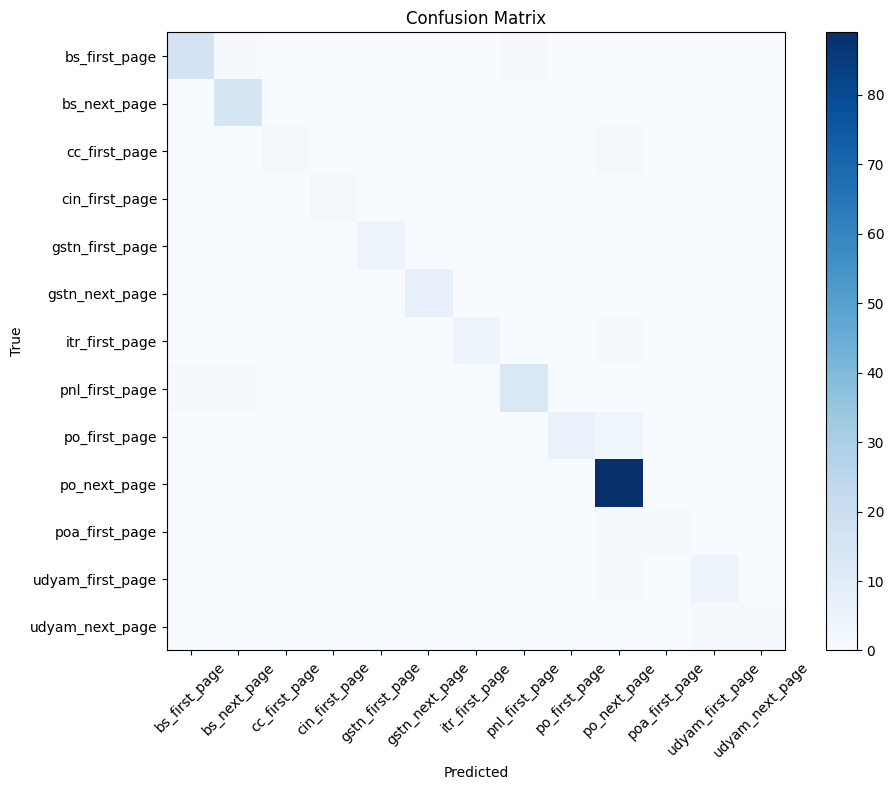

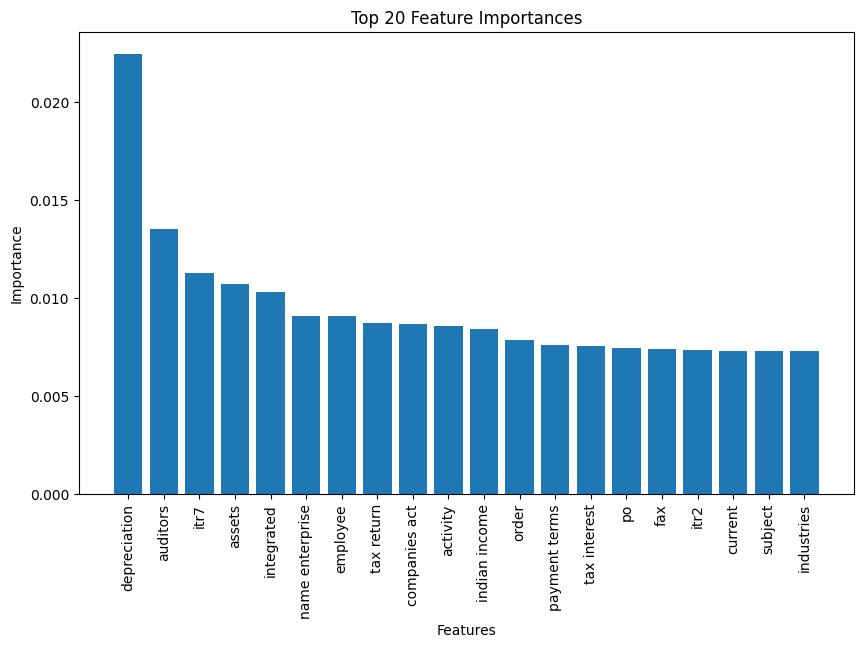

In [55]:
mlflow.set_experiment("Document Classification Using DistilBert For New Data-1")

with mlflow.start_run():
    # Log parameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    for class_name, metrics in class_report_dict.items():
        # Check if the item is a class (not 'accuracy', 'macro avg', or 'weighted avg')
        if isinstance(metrics, dict) and 'precision' in metrics:
            mlflow.log_metric(f'{class_name}_precision', metrics['precision'])
            mlflow.log_metric(f'{class_name}_recall', metrics['recall'])
            mlflow.log_metric(f'{class_name}_f1_score', metrics['f1-score'])
            mlflow.log_metric(f'{class_name}_support', metrics['support'])
    
    # Log overall accuracy if it's available
    if 'accuracy' in class_report_dict:
        mlflow.log_metric('accuracy', class_report_dict['accuracy'])
    
    # Log macro and weighted averages if available
    for avg_type in ['macro avg', 'weighted avg']:
        if avg_type in class_report_dict:
            for metric, value in class_report_dict[avg_type].items():
                mlflow.log_metric(f'{avg_type}_{metric}', value)

    # Log the model
    mlflow.xgboost.log_model(xgb, "xgboost_model")

    # Plot and log confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(unique_classes))
    plt.xticks(tick_marks, unique_classes, rotation=45)
    plt.yticks(tick_marks, unique_classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    confusion_matrix_path = "confusion_matrix.png"
    plt.savefig(confusion_matrix_path)
    mlflow.log_artifact(confusion_matrix_path)

    # Log feature importance
    feature_importance = pd.DataFrame({
        'feature': vectorizer.get_feature_names_out(),
        'importance': xgb.feature_importances_
    }).sort_values('importance', ascending=False)

    top_features = feature_importance.head(20)
    plt.figure(figsize=(10, 6))
    plt.bar(top_features['feature'], top_features['importance'])
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    feature_importance_path = "feature_importance.png"
    plt.savefig(feature_importance_path, bbox_inches='tight')
    mlflow.log_artifact(feature_importance_path)

    # Log the feature importance dataframe
    feature_importance.to_csv("feature_importance.csv", index=False)
    mlflow.log_artifact("feature_importance.csv")

